## Library importation and Dataset importation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\pcd\Desktop\IT Stuffs\jesse\ML work\supervised Learning\p_main.csv')

## Data Exploration

In [3]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [6]:
data=data.rename(columns={'UDI':'udi', 'Product ID':'p_id', 'Type':'type','Air temperature [K]':'air_temp',\
                         'Process temperature [K]':'p_temp','Rotational speed [rpm]':'rs',\
                          'Torque [Nm]':'tq','Tool wear [min]':'tw','Target':'target','Failure Type':'ft'})

In [7]:
data

,udi,p_id,type,air_temp,p_temp,rs,tq,tw,target,ft
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [8]:
s=data['target']
data=data.drop('target',axis=1)
data['target']=s
data

,udi,p_id,type,air_temp,p_temp,rs,tq,tw,ft,target
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,No Failure,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure,0


<AxesSubplot:>

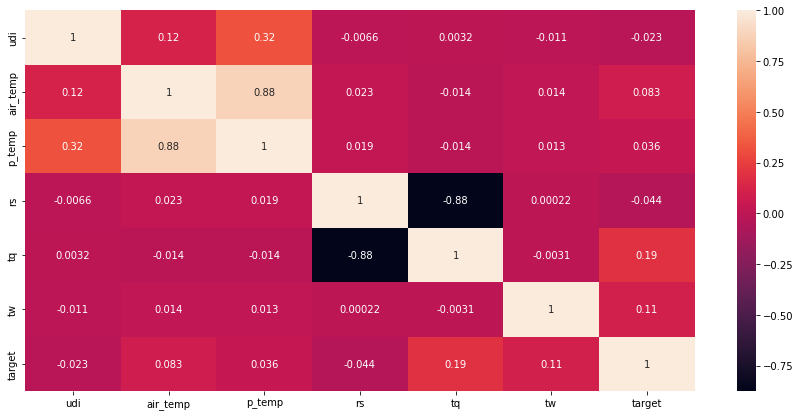

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='target', ylabel='count'>

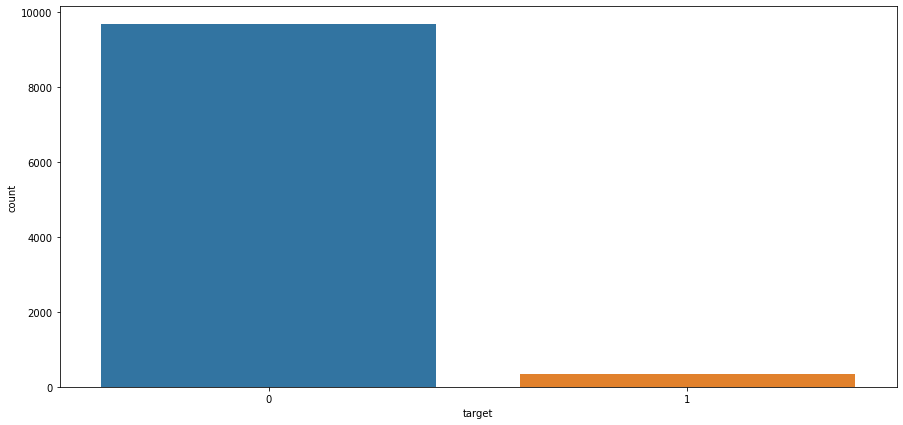

In [10]:
plt.figure(figsize=(15,7))
sns.countplot('target',data=data)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   udi       10000 non-null  int64  
 1   p_id      10000 non-null  object 
 2   type      10000 non-null  object 
 3   air_temp  10000 non-null  float64
 4   p_temp    10000 non-null  float64
 5   rs        10000 non-null  int64  
 6   tq        10000 non-null  float64
 7   tw        10000 non-null  int64  
 8   ft        10000 non-null  object 
 9   target    10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [12]:
data.target.value_counts()

0    9661
1     339
Name: target, dtype: int64

In [13]:
data.ft.value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: ft, dtype: int64

In [14]:
data=data.drop(['udi','p_id'],axis=1)

In [15]:
data

,type,air_temp,p_temp,rs,tq,tw,ft,target
0,M,298.1,308.6,1551,42.8,0,No Failure,0
1,L,298.2,308.7,1408,46.3,3,No Failure,0
2,L,298.1,308.5,1498,49.4,5,No Failure,0
3,L,298.2,308.6,1433,39.5,7,No Failure,0
4,L,298.2,308.7,1408,40.0,9,No Failure,0
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure,0
9996,H,298.9,308.4,1632,31.8,17,No Failure,0
9997,M,299.0,308.6,1645,33.4,22,No Failure,0
9998,H,299.0,308.7,1408,48.5,25,No Failure,0


In [16]:
data['type'].unique()

array(['M', 'L', 'H'], dtype=object)

## Data preprocessing

In [17]:
lb=LabelEncoder()
data['type']=lb.fit_transform(data['type'])
data

,type,air_temp,p_temp,rs,tq,tw,ft,target
0,2,298.1,308.6,1551,42.8,0,No Failure,0
1,1,298.2,308.7,1408,46.3,3,No Failure,0
2,1,298.1,308.5,1498,49.4,5,No Failure,0
3,1,298.2,308.6,1433,39.5,7,No Failure,0
4,1,298.2,308.7,1408,40.0,9,No Failure,0
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,No Failure,0
9996,0,298.9,308.4,1632,31.8,17,No Failure,0
9997,2,299.0,308.6,1645,33.4,22,No Failure,0
9998,0,299.0,308.7,1408,48.5,25,No Failure,0


<AxesSubplot:>

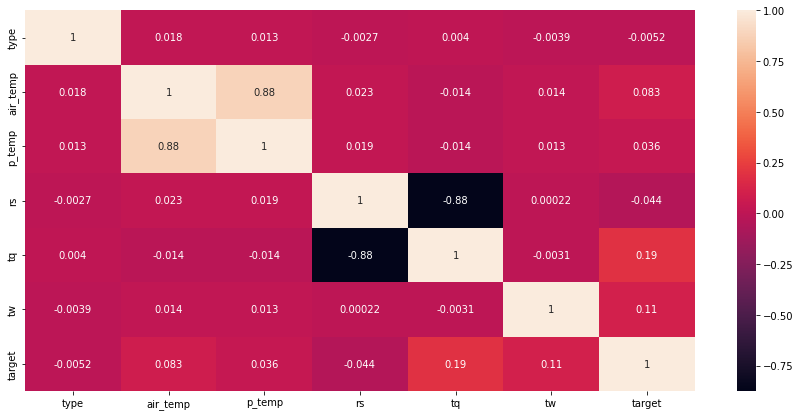

In [18]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

In [19]:
data['ft'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [20]:
data['ft']=lb.fit_transform(data['ft'])
data

,type,air_temp,p_temp,rs,tq,tw,ft,target
0,2,298.1,308.6,1551,42.8,0,1,0
1,1,298.2,308.7,1408,46.3,3,1,0
2,1,298.1,308.5,1498,49.4,5,1,0
3,1,298.2,308.6,1433,39.5,7,1,0
4,1,298.2,308.7,1408,40.0,9,1,0
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,1,0
9996,0,298.9,308.4,1632,31.8,17,1,0
9997,2,299.0,308.6,1645,33.4,22,1,0
9998,0,299.0,308.7,1408,48.5,25,1,0


## Data Splitting

In [21]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x.shape

(10000, 7)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

## Model Development

In [23]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       985
           1       0.47      1.00      0.64        15

    accuracy                           0.98      1000
   macro avg       0.73      0.99      0.81      1000
weighted avg       0.99      0.98      0.99      1000



In [24]:
svm_model=SVC()
svm_model.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1000
           1       0.00      0.00      0.00         0

    accuracy                           0.97      1000
   macro avg       0.50      0.48      0.49      1000
weighted avg       1.00      0.97      0.98      1000



Precision: Focuses on correct positive predictions
Formula: Precision = (True Positives) / (True Positives + False Positives)
    
Recall: Identifying all positive cases
Formular: (True Positives) / (True Positives + False Negatives)
    
    
F1-score: mean of precision and recall
formular: 2 * (Precision * Recall) / (Precision + Recall)

In [25]:
# import pickle
# with open('model.pkl', 'wb') as files:
#     pickle.dump(lr_model, files)
# with open('model.pkl' , 'rb') as f:
#     lr = pickle.load(f)

## Feature Selection

In [26]:
from sklearn.feature_selection import SelectKBest,f_classif
select=SelectKBest(score_func=f_classif,k=4)
z=select.fit_transform(x,y)
flt=select.get_support()
s=x.columns
print(s[flt])
x=data[['air_temp', 'tq', 'tw', 'ft']]

Index(['air_temp', 'tq', 'tw', 'ft'], dtype='object')


## CLASS IMBALANCE HANDLING

In [27]:
from imblearn.over_sampling import SMOTE

sc=StandardScaler()
x=sc.fit_transform(x)

smote = SMOTE()
x1, y1= smote.fit_resample(x, y)

In [28]:
x_train_resampled,x_test,y_train_resampled,y_test=train_test_split(x1,y1,test_size=.1)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       945
           1       1.00      0.98      0.99       988

    accuracy                           0.99      1933
   macro avg       0.99      0.99      0.99      1933
weighted avg       0.99      0.99      0.99      1933



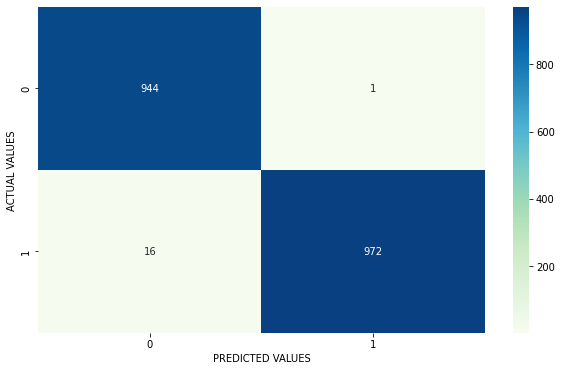

In [29]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier()
bagging_model.fit(x_train_resampled,y_train_resampled)
y_pred = bagging_model.predict(x_test)
print(classification_report(y_test,y_pred))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1025
           1       0.72      0.79      0.75       908

    accuracy                           0.76      1933
   macro avg       0.76      0.76      0.76      1933
weighted avg       0.76      0.76      0.76      1933



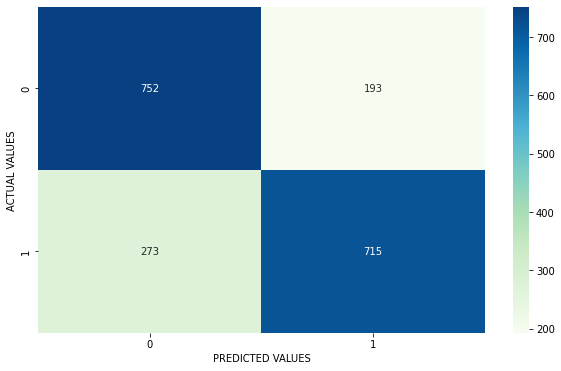

In [30]:
lr_model=LogisticRegression()
lr_model.fit(x_train_resampled,y_train_resampled)
lr_pred=lr_model.predict(x_test)
print(classification_report(lr_pred,y_test))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       970
           1       0.97      1.00      0.99       963

    accuracy                           0.99      1933
   macro avg       0.99      0.99      0.99      1933
weighted avg       0.99      0.99      0.99      1933



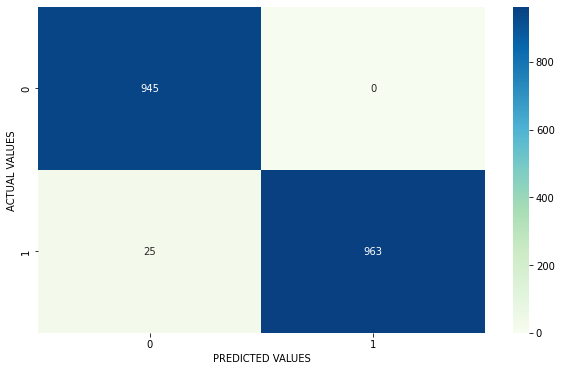

In [31]:
svm_model=SVC()
svm_model.fit(x_train_resampled,y_train_resampled)
svm_pred=svm_model.predict(x_test)
print(classification_report(svm_pred,y_test))
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()